# **HOME CREDIT**


---



# Introduction

Name : Geraldine Dewarani


---


Objectives : Home Credit recognizes the value of their data and believes there is untapped potential in it. The objective is to explore and leverage the available data sources to discover meaningful insights and develop innovative strategies. This includes utilizing statistical and machine learning methods, as well as exploring advanced techniques to extract hidden patterns, identify relevant features, and improve the overall predictive power of the models.

# External Link

DataSet and Requirements : https://www.kaggle.com/competitions/home-credit-default-risk

Deployment : https://huggingface.co/spaces/andinedwrn/homecreditbureau

# **WORK AREA**

---



# Import Libraries and Data Loading

## Import Libraries

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [2]:
# Basic Library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

#Modelling
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import BatchNormalization

import pickle

## Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!mkdir ~/.kaggle

# !cp 'kaggle.json' ~/.kaggle
!cp '/content/drive/MyDrive/kagglejson/kaggle.json' ~/.kaggle

!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle competitions download -c home-credit-default-risk

 99% 684M/688M [00:08<00:00, 97.6MB/s]
100% 688M/688M [00:08<00:00, 86.1MB/s]


In [7]:
!unzip -q home-credit-default-risk.zip -d homecredit

In [8]:
# Checking Folder
os.listdir('/content/homecredit' )

['HomeCredit_columns_description.csv',
 'sample_submission.csv',
 'previous_application.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'bureau_balance.csv',
 'application_train.csv',
 'application_test.csv',
 'bureau.csv']

In [9]:
# Import the datasets
train = pd.read_csv("/content/homecredit/application_train.csv")
test = pd.read_csv("/content/homecredit/application_test.csv")

In [49]:
sample = pd.read_csv("/content/homecredit/sample_submission.csv")

In [8]:
pos_cash = pd.read_csv("/content/homecredit/POS_CASH_balance.csv")
bureau_bal = pd.read_csv("/content/homecredit/bureau_balance.csv")
bureau = pd.read_csv("/content/homecredit/bureau.csv")
cc_bal = pd.read_csv("/content/homecredit/credit_card_balance.csv")
previous_app = pd.read_csv("/content/homecredit/bureau.csv")
installment_payment = pd.read_csv("/content/homecredit/installments_payments.csv")
credit_card_bal = pd.read_csv("/content/homecredit/credit_card_balance.csv")

from the available data files. There are a total of 10 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 7 other files containing additional information about each loan. Therefore due to insufficient time and resources, we mainly focused our modeling with train and test dataset. The rest of the information will be explored more on the data exploratory section. so lets get started.

In [50]:
sample.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [51]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [9]:
print('Training data shape: ',train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


# Exploratory Data Analysis

## Train and Test Set

**Target value distribution**

---



In [5]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

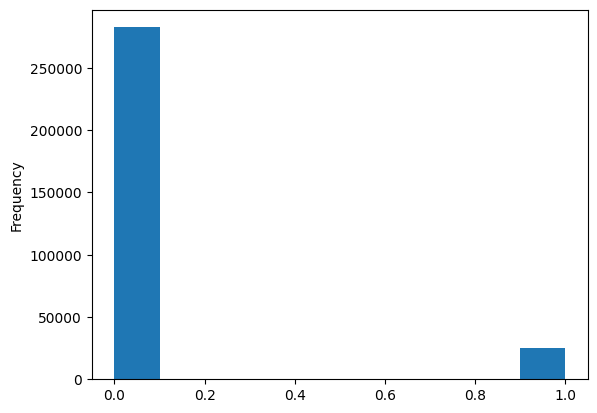

In [6]:
train['TARGET'].astype(int).plot.hist();

The data provided shows an imbalanced distribution of the target variable. The majority class ("0") has a significantly higher count of 282,686, while the minority class ("1") has a count of 24,825. this distribution accurately represents the problem domain, therefore there might not be a need to balance the classes artificially.
the specific business context of Home Credit's lending operations and risk assessment justifies the imbalance. We want to focused on accurately identifying positive instances (class "1"), which represent clients with a higher risk of defaulting on their loans. By prioritizing the identification of risky cases, we can allocate resources and interventions accordingly.

## Bureau and Bureau balance

In [24]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [13]:
#Analyze the count of unique SK_ID_CURR values to determine the number of loans
num_loans = bureau['SK_ID_CURR'].nunique()
print("\nNumber of loans:", num_loans)


Number of loans: 305811


### Credit Status Count

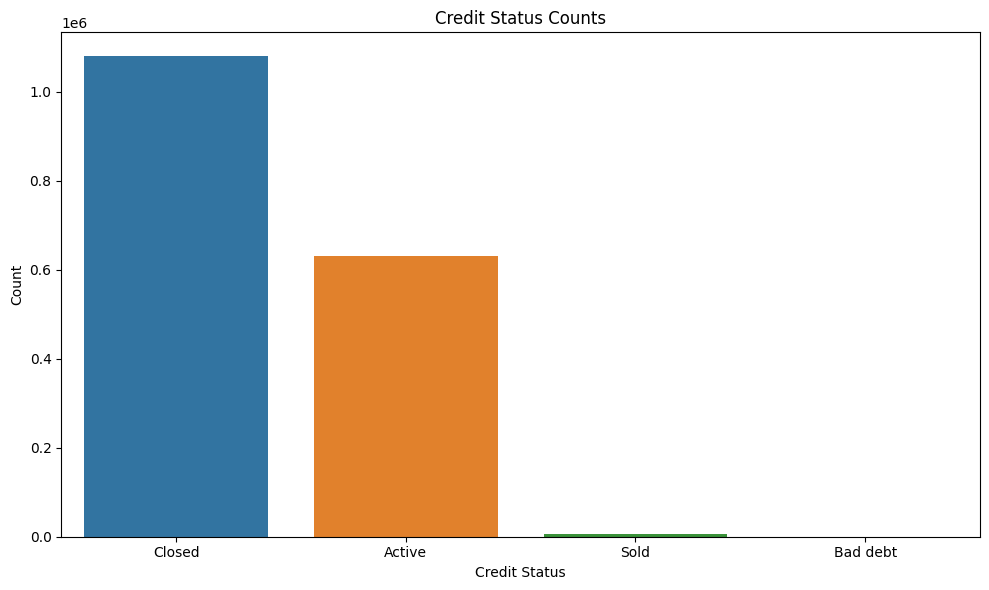

In [16]:
# Analyze the frequency of different credit statuses
credit_status_counts = bureau['CREDIT_ACTIVE'].value_counts()

# Create a bar plot for credit status counts
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_status_counts.index, y=credit_status_counts.values)
plt.xlabel("Credit Status")
plt.ylabel("Count")
plt.title("Credit Status Counts")
plt.tight_layout()
plt.show()


Each credit status represents a specific condition or outcome of the credit.

- Closed: This status indicates that the credit has been fully repaid and closed. It implies that the borrower has successfully fulfilled their repayment obligations, and the credit has reached its completion. "Closed" is the most common credit status, with a count of 1,079,273.
- Active: The active status means that the credit is currently open and ongoing. It suggests that the borrower still has an outstanding balance or repayment obligation on the credit."Active" is the second most common credit status, with a count of 630,607.
- Sold: When a credit is sold, it means that the ownership or servicing of the credit has been transferred to another entity. This could be a financial institution or a debt collection agency that has acquired the credit."Sold" has a relatively lower count of 6,527.
- Bad debt: This status indicates that the credit has become irrecoverable or unlikely to be repaid. It implies that the borrower has defaulted on their repayment obligations, resulting in a loss for the lender."Bad debt" has the lowest count of 21.

Based on the provided credit status counts, it can be inferred that a significant number of credits have been successfully closed, which is a positive sign. The relatively lower counts of "Sold" and "Bad debt" statuses suggest that these situations are less common in the dataset.

### Credit Type

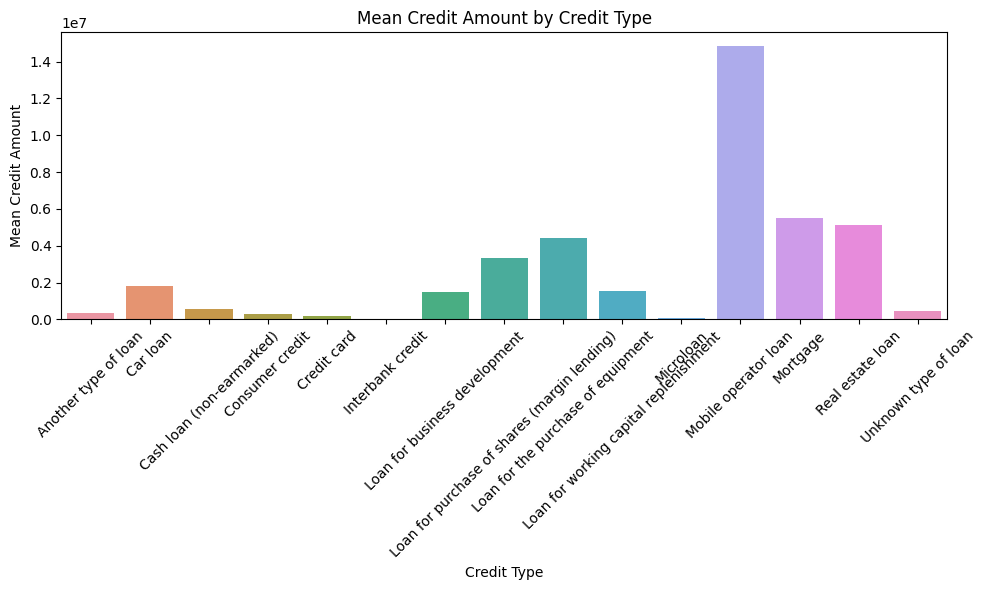

In [10]:
# Group by credit type and calculate the mean credit amount
credit_type_group = bureau.groupby('CREDIT_TYPE')
mean_credit_amount = credit_type_group['AMT_CREDIT_SUM'].mean()

# Create a bar plot for mean credit amount by credit type
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_credit_amount.index, y=mean_credit_amount.values)
plt.xticks(rotation=45)
plt.xlabel("Credit Type")
plt.ylabel("Mean Credit Amount")
plt.title("Mean Credit Amount by Credit Type")
plt.tight_layout()
plt.show()


In [11]:
mean_credit_amount

CREDIT_TYPE
Another type of loan                            3.516632e+05
Car loan                                        1.823916e+06
Cash loan (non-earmarked)                       5.414571e+05
Consumer credit                                 3.061121e+05
Credit card                                     1.724684e+05
Interbank credit                                1.350000e+04
Loan for business development                   1.462141e+06
Loan for purchase of shares (margin lending)    3.334500e+06
Loan for the purchase of equipment              4.432927e+06
Loan for working capital replenishment          1.559215e+06
Microloan                                       5.294773e+04
Mobile operator loan                            1.485000e+07
Mortgage                                        5.500695e+06
Real estate loan                                5.109186e+06
Unknown type of loan                            4.323452e+05
Name: AMT_CREDIT_SUM, dtype: float64

as we can see

- "Mobile operator loan" has the highest mean credit amount with approximately 14,850,000.
- "Loan for the purchase of equipment" and "Real estate loan" have relatively high mean credit amounts, with approximately 4,432,927 and 5,109,186 respectively.
- "Loan for purchase of shares (margin lending)" and "Mortgage" also have relatively high mean credit amounts, with approximately 3,334,500 and 5,500,695 respectively.
- "Consumer credit" and "Cash loan (non-earmarked)" have moderate mean credit amounts, with approximately 306,112 and 541,457 respectively.
- Other types of loans have relatively lower mean credit amounts.

This information provides insights into the average credit amounts for different loan types. It can be useful for understanding the distribution and average borrowing amounts in each credit type category.

### Credit Currency

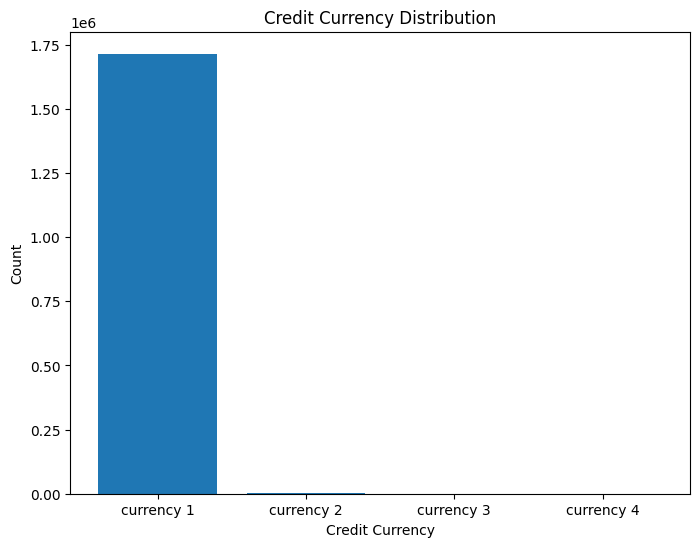

In [25]:
# Credit Currency Distribution
credit_currency_counts = bureau['CREDIT_CURRENCY'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(credit_currency_counts.index, credit_currency_counts.values)
plt.xlabel('Credit Currency')
plt.ylabel('Count')
plt.title('Credit Currency Distribution')
plt.show()

 It suggests that the majority of the loans are denominated in "Currency 1," while "Currency 2," "Currency 3," and "Currency 4" are less common.

# Feature Engineering

## Handling Anonmalies

In [10]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

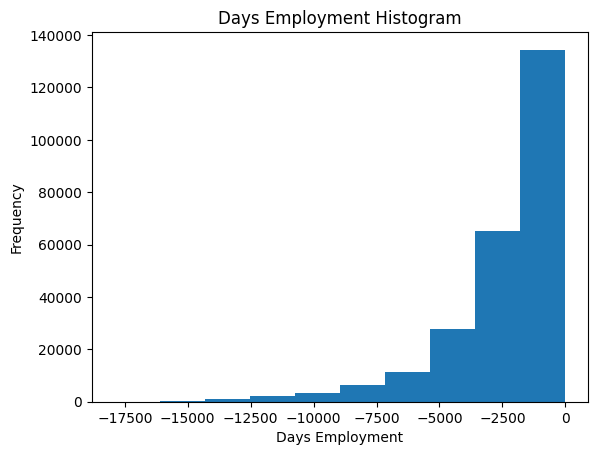

In [11]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

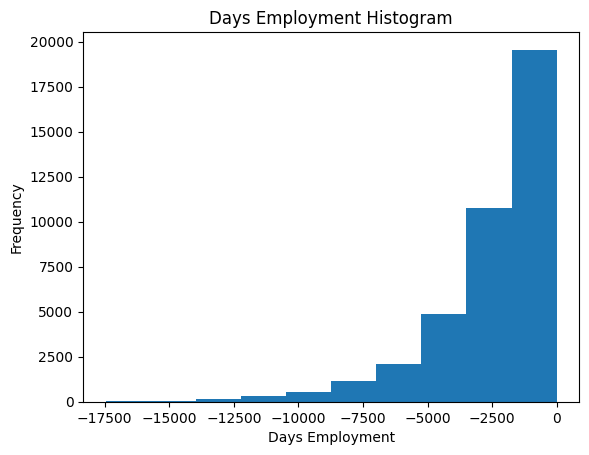

In [12]:
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)
test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## Correlation

In [13]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

<ipython-input-13-25f487bb0cb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()['TARGET'].sort_values()


Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


## Handling missing values

In [14]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values

Your selected dataframe has 123 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [16]:
# lookin at class uniqueness in each col
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Feature Encoding

In [17]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 240)


Label encoding is suitable for data with two unique values because it assigns a binary representation (0 or 1) to each category, effectively capturing the information in a concise manner. It is a simple and efficient way to transform binary categorical variables.

On the other hand, one-hot encoding is preferred for data with more than two unique values. It creates binary columns for each category, where a value of 1 indicates the presence of that category and 0 indicates its absence. One-hot encoding ensures that each category is treated independently and avoids introducing any ordinality or hierarchy among the categories. It allows the machine learning algorithm to learn distinct patterns and relationships between different categories.


In [19]:
# aligning train and test shape
y = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = y

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


## Drop the TARGET coloumn

In [20]:
# Copy of train data with target drop
train_x = train.drop(columns = ['TARGET'])

In [21]:
# Copy of the testing data
test_x = test.copy()

## Feature Scaling and Imputing

In [22]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

The choice of using median imputation for missing values and scaling features using MinMaxScaler is motivated by their simplicity and effectiveness in data preprocessing. Median imputation replaces missing values with the median, preserving the data's central tendency without distorting its distribution. MinMaxScaler scales features to a range of 0-1, maintaining relative relationships and preventing one feature from dominating the learning process. These techniques are robust, easy to implement, and compatible with various machine learning algorithms, providing a solid foundation for preprocessing data and enhancing model performance.

In [23]:
# Fit on the training data
imputer.fit(train_x)

# Transform both training and testing data
train = imputer.transform(train_x)
test = imputer.transform(test_x)

# Repeat with the scaler
scaler.fit(train_x)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Modeling

## Logistic Regression

In [80]:
# Define the model
model1_log = LogisticRegression(max_iter=1000)

# Train on the training data
model1_log.fit(train, y)

LogisticRegression(max_iter=1000)

In [81]:
# Make predictions
# Make sure to select the second column only
model1_pred = model1_log.predict_proba(test)[:, 1]
model1_pred

array([0.05846799, 0.21641044, 0.04087661, ..., 0.05306961, 0.05008921,
       0.13059281])

In [82]:
# Create submission dataframe
submit_1 = pd.DataFrame()
submit_1['SK_ID_CURR'] = test_x['SK_ID_CURR']
submit_1['TARGET'] = model1_pred

submit_1.head()

,SK_ID_CURR,TARGET
0,100001,0.058468
1,100005,0.216410
2,100013,0.040877
3,100028,0.034461
4,100038,0.121106


## CatBoost

In [ ]:
# Define the Model
model2_cb = CatBoostClassifier()

# Train on the training data
model2_cb.fit(train, y)

In [62]:
# Make predictions
# Make sure to select the second column only
model2_cb = model2_cb.predict_proba(test)[:, 1]
model2_cb

array([0.02589782, 0.17934473, 0.01498498, ..., 0.02548864, 0.04022784,
       0.15343502])

In [64]:
# Create submission dataframe
submit_2 = pd.DataFrame()
submit_2['SK_ID_CURR'] = test_x['SK_ID_CURR']
submit_2['TARGET'] = model2_cb

submit_2.head()

,SK_ID_CURR,TARGET
0,100001,0.025898
1,100005,0.179345
2,100013,0.014985
3,100028,0.031924
4,100038,0.128495


## LightGBM

In [72]:
import lightgbm as lgb

In [73]:
# Define the Model
model3_lgb = lgb.LGBMClassifier()

# Train on the training data
model3_lgb.fit(train, y)

LGBMClassifier()

In [74]:
# Make predictions
# Make sure to select the second column only
model3_lgb = model3_lgb.predict_proba(test)[:, 1]
model3_lgb

array([0.03778437, 0.11150239, 0.01851233, ..., 0.03431677, 0.04946585,
       0.16023343])

In [75]:
# Create submission dataframe
submit_3 = pd.DataFrame()
submit_3['SK_ID_CURR'] = test_x['SK_ID_CURR']
submit_3['TARGET'] = model3_lgb

submit_3.head()

,SK_ID_CURR,TARGET
0,100001,0.037784
1,100005,0.111502
2,100013,0.018512
3,100028,0.033137
4,100038,0.145960


# Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define the estimator objects
model1_log = LogisticRegression(max_iter=1000)
model2_cb = CatBoostClassifier(learning_rate=None)  # Exclude learning rate
model3_lgb = LGBMClassifier(learning_rate=None)  # Exclude learning rate

# Define the list of models for cross-validation
models = [
    ('Logistic Regression', model1_log),
    ('CatBoost', model2_cb),
    ('LightGBM', model3_lgb)
]

scorer = make_scorer(roc_auc_score, needs_proba=True)

for model_name, model in models:
    scores = cross_val_score(model, train, y, cv=5, scoring=scorer)
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"{model_name}: ROC-AUC mean score: {mean_score:.4f}, std: {std_score:.4f}")



Based on the cross-validation results, the models achieved the following mean ROC-AUC scores:

- Logistic Regression: Mean ROC-AUC score of 0.7458 with a standard deviation of 0.0028.
- CatBoost: Mean ROC-AUC score of 0.7547 with a standard deviation of 0.0036.
- LightGBM: Mean ROC-AUC score of 0.7542 with a standard deviation of 0.0032.

# Analysis

## Overall Analysis

In summary, the data analysis highlights key findings related to Home Credit's loan portfolio. The distribution of credit statuses indicates a significant number of closed and active credits, reflecting a positive repayment trend. The occurrences of sold credits and bad debt are relatively low, suggesting effective credit management practices.

Analyzing the average credit amounts by loan type reveals variations across different categories. Mobile operator loans have the highest average credit amount, followed by loans for equipment and real estate. Loans for the purchase of shares and mortgages also exhibit relatively high average amounts. Consumer credits and cash loans have moderate average amounts, while other loan types show lower averages.

Examining the credit currency, most loans are denominated in "Currency 1," with other currencies being less prevalent.

These insights provide valuable information for Home Credit in terms of understanding credit statuses, average borrowing amounts for different loan types, and the currency distribution within their loan portfolio. By leveraging these findings, Home Credit can make informed decisions regarding credit management, risk assessment, and resource allocation to enhance their lending operations.

## Model Analysis

**Why choose ROC-AUC as evaluation metrix :**

ROC-AUC as an evaluation method is chosen because ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a useful metric for measuring the performance of a classification model, especially it works really well, in imbalance class like we have in the dataset. ROC-AUC depicts the model's ability to distinguish between positive and negative classes by calculating the area under the ROC curve. The higher the ROC-AUC score, the better the model's ability to make accurate predictions.

Based on the evaluation results, the three evaluated models (Logistic Regression, CatBoost, and LightGBM) showed good performance. CatBoost and LightGBM achieved higher mean ROC-AUC scores compared to Logistic Regression. This indicates that these models have better ability to differentiate between clients who are likely to repay and those who are not.

**Model Advantages and Disadvantage :**

Advantages:
1. CatBoost and LightGBM are powerful models for handling complex and large datasets, and they have the capability to handle categorical features automatically, making the modeling process easier.
2. ROC-AUC provides an overall view of the model's performance in distinguishing between positive and negative classes, especially when the classes are imbalanced.

Limitations:
1. The use of ROC-AUC may not directly reflect the business objectives. Sometimes, the choice of evaluation metric should be based on specific business goals.
2. More complex models like CatBoost and LightGBM may require more time and computational resources for training and implementation compared to Logistic Regression.
3. Model evaluation only focuses on predictive performance, while other aspects such as interpretability and model robustness should also be considered.

Model development is closely related to the Home Credit business domain. In the credit industry, model development plays a crucial role in helping Home Credit make better loan decisions and effectively manage credit risk. By leveraging alternative data, Home Credit can gain deeper insights into the repayment abilities of their clients and improve the overall borrowing experience. With accurate models, Home Credit can expand financial inclusion for underserved populations and provide a positive and safe borrowing experience for their clients.

## Further Improvement

Due to the insufficient time and resources, we only explore a few of dataset but to further enhance the models' performance in predicting clients' repayment abilities for Home Credit, some improvement plan can help. First, optimize the models' hyperparameters to maximize their performance through techniques like grid search or random search. Additionally, we can focus on model interpretability to gain insights into factors influencing predictions. Establish a system for continuous monitoring and updating of models, and collaborate with domain experts to align the models with specific business requirements and risks. By implementing these strategies, Home Credit can improve the accuracy, reliability, and interpretability of their models, leading to better loan decisions and an enhanced borrowing experience for their clients.